In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Variables 
MIMIC_PATH = "../mimiciv2.2/hosp/"
POST_PROCESS_PATH = "./post_process/"

# make the POST_PROCESS_PATH
from pathlib import Path
Path(POST_PROCESS_PATH).mkdir(parents=True, exist_ok=True)

### Demographic

In [5]:
demographics_df = pd.read_csv(MIMIC_PATH + "admissions.csv", index_col='subject_id')
demographics_df = demographics_df.reset_index() \
    .drop(["admittime", "subject_id"], axis="columns")
demographics_df.head()

,hadm_id,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,22595853,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,22841357,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,25742920,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,29079034,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,25022803,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [6]:
demographics_df.shape

(431231, 14)

In [7]:
note01_df = pd.read_csv(POST_PROCESS_PATH + "selected_ids.csv")
note01_df.shape

(180733, 5)

In [8]:
note01_df.head(1)

,subject_id,hadm_id,admittime,gender,anchor_age
0,10000032,22595853,2180-05-06,F,52


In [9]:
note2_df = note01_df.merge(demographics_df, on = "hadm_id", how = "left")
note2_df.sort_index().head()


,subject_id,hadm_id,admittime,gender,anchor_age,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06,F,52,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000068,25022803,2160-03-03,F,19,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
2,10000084,23052089,2160-11-21,M,72,2160-11-25 14:52:00,NaN,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0
3,10000108,27250926,2163-09-27,M,25,2163-09-28 09:04:00,NaN,EU OBSERVATION,P38XXV,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2163-09-27 16:18:00,2163-09-28 09:04:00,0
4,10000117,22927623,2181-11-15,F,48,2181-11-15 14:52:00,NaN,EU OBSERVATION,P2358X,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,2181-11-14 21:51:00,2181-11-15 09:57:00,0


In [10]:
note2_df.shape

(180733, 18)

In [11]:
note2_df.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
gender                       0
anchor_age                   0
dischtime                    0
deathtime               176820
admission_type               0
admit_provider_id            2
admission_location           0
discharge_location       51434
insurance                    0
language                     0
marital_status            7858
race                         0
edregtime                54646
edouttime                54646
hospital_expire_flag         0
dtype: int64

/tmp/ipykernel_731177/771739485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")


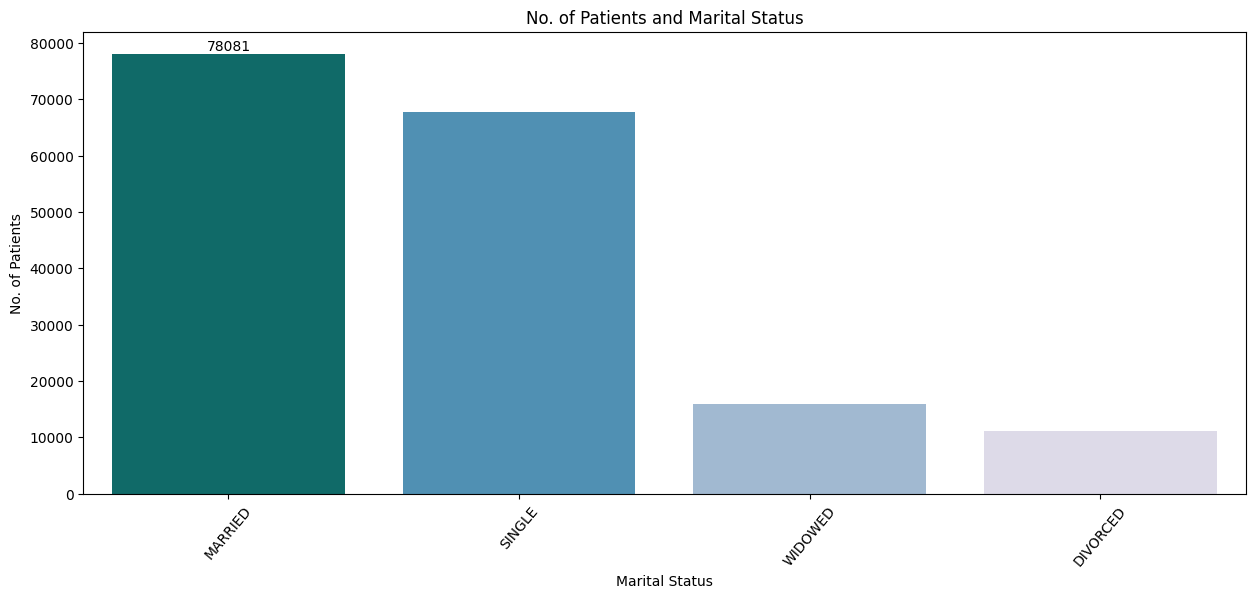

In [12]:
d = note2_df.groupby("marital_status")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Marital Status")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=50)
plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

/tmp/ipykernel_731177/2283405867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")


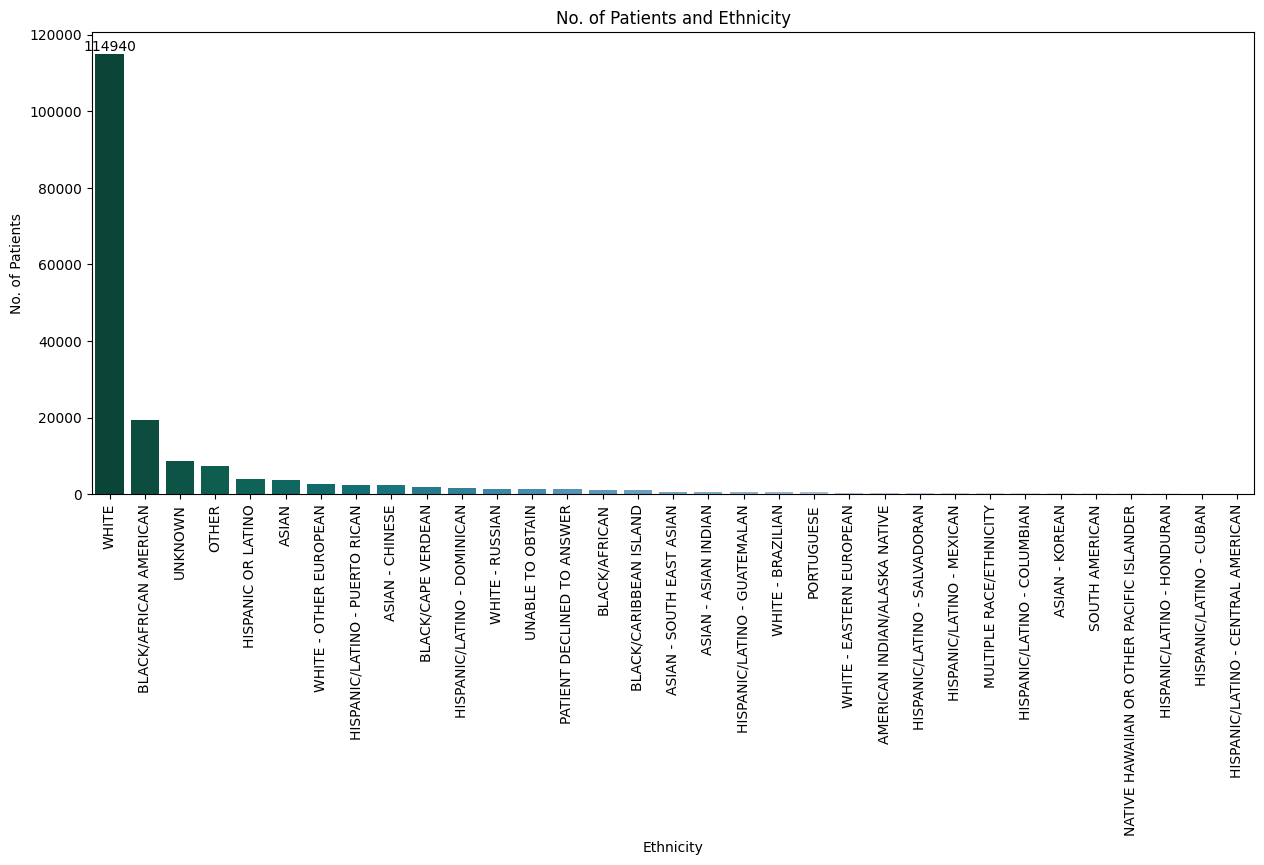

In [13]:
d = note2_df.groupby("race")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Ethnicity")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=90)
plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

/tmp/ipykernel_731177/3913326930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")


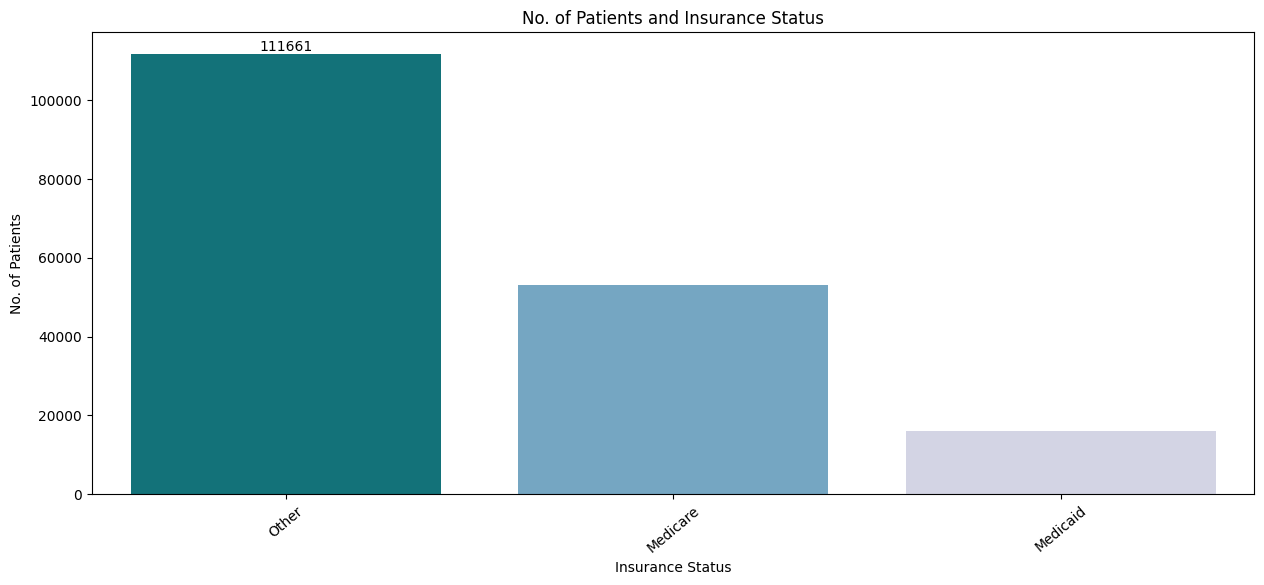

In [14]:
d = note2_df.groupby("insurance")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Insurance Status")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=40)
plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

/tmp/ipykernel_731177/2239953633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")


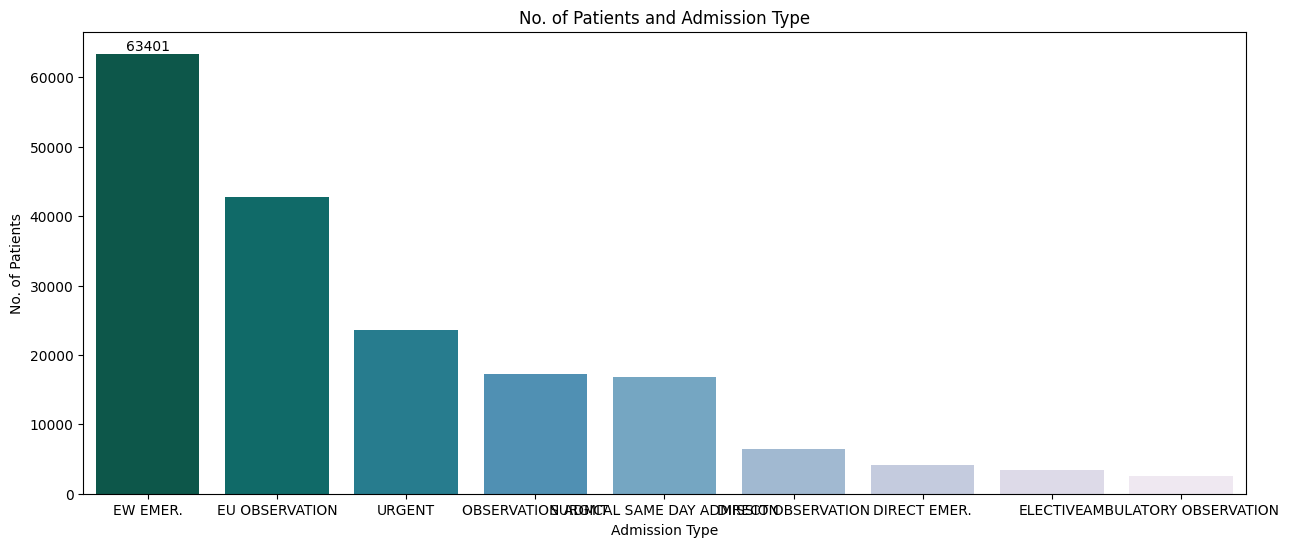

In [15]:
d = note2_df.groupby("admission_type")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Admission Type")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=0)
plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

/tmp/ipykernel_731177/2028270297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")


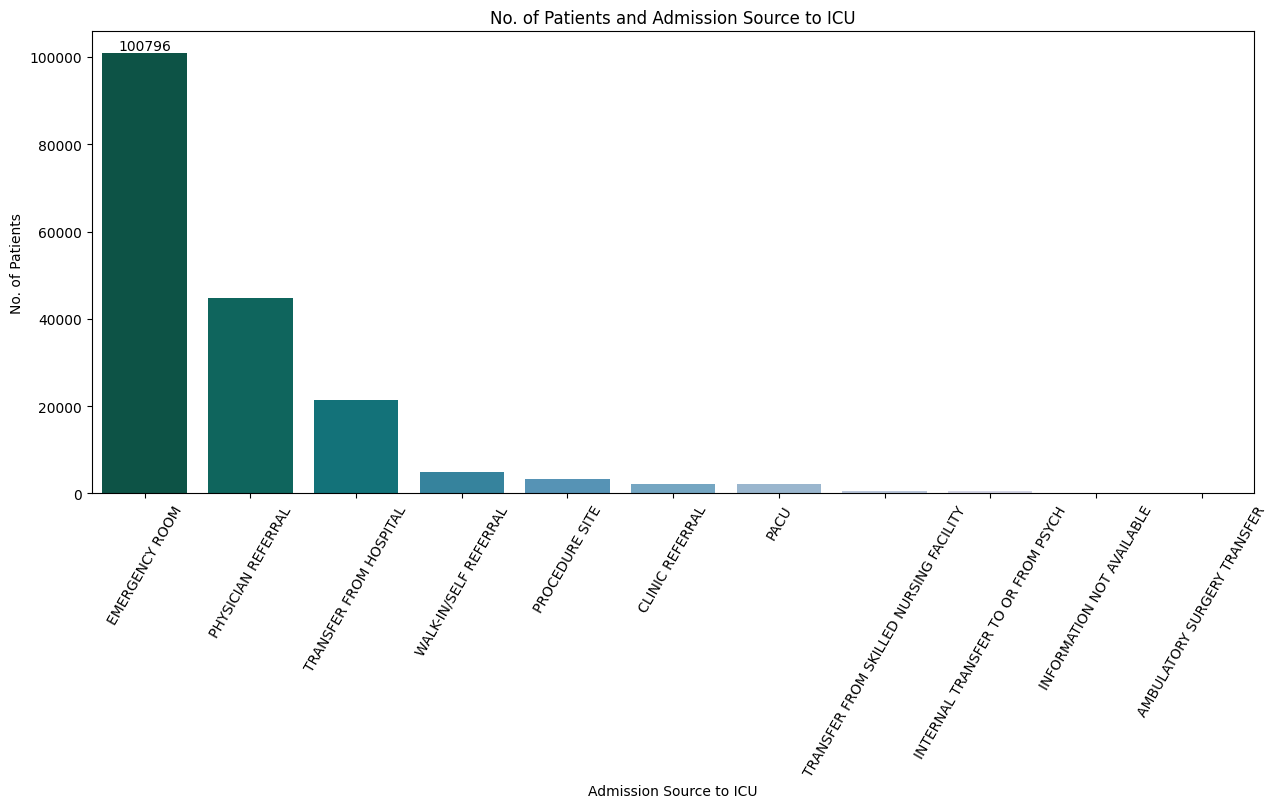

In [16]:
d = note2_df.groupby("admission_location")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Admission Source to ICU")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=60)
plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

/tmp/ipykernel_731177/2206196246.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = note2_df, x = "anchor_age", bins = "auto" ,palette="PuBuGn_r", kde = True)


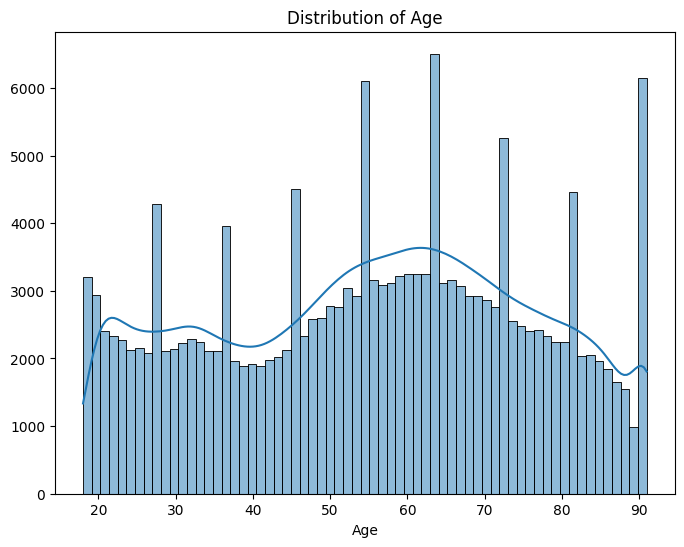

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data = note2_df, x = "anchor_age", bins = "auto" ,palette="PuBuGn_r", kde = True)

plt.xlabel(x:="Age")
plt.ylabel(y:="")
plt.title(t:="Distribution of Age")
plt.xticks(rotation=0)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [18]:
print(note2_df["anchor_age"].mean())
print(note2_df["anchor_age"].median())

55.37637288154349
57.0


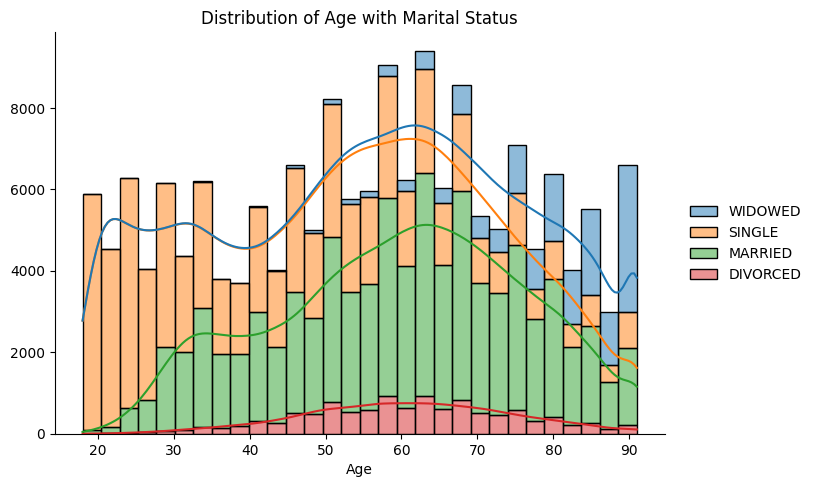

In [28]:
sns.displot(data = note2_df, x = "anchor_age", bins = 30 , hue = 'marital_status',
            kde = True, height =4.75, aspect = 1.5, multiple="stack").legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")
plt.title(t:="Distribution of Age with Marital Status")

plt.xticks(rotation=0)

plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [1]:
def mean_calc(col_name, unique):
    med = note2_df[note2_df[col_name]== unique]["anchor_age"].median()
    
    return med

# Medain of each Types

In [19]:
d = {}

for i in note2_df["marital_status"].unique():
    a = mean_calc("marital_status", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'SINGLE': 42.0, 'MARRIED': 61.0, 'DIVORCED': 61.0, 'WIDOWED': 82.0, nan: nan}

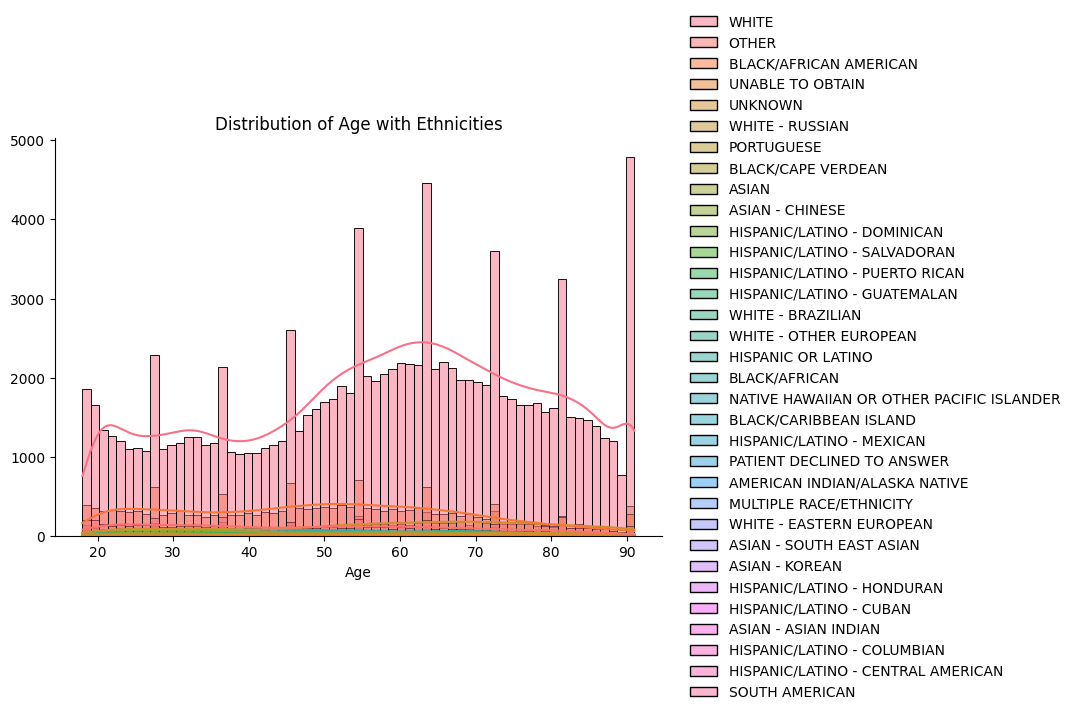

In [21]:
sns.displot(data = note2_df, x = "anchor_age", bins = "auto" , hue = 'race',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Ethnicities")
plt.xticks(rotation=0)

plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [22]:
d = {}

for i in note2_df["race"].unique():
    a = mean_calc("race", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'ASIAN - KOREAN': 33.0,
 'HISPANIC/LATINO - MEXICAN': 37.0,
 'HISPANIC/LATINO - SALVADORAN': 39.0,
 'MULTIPLE RACE/ETHNICITY': 39.0,
 'ASIAN - ASIAN INDIAN': 41.0,
 'WHITE - BRAZILIAN': 42.0,
 'HISPANIC OR LATINO': 43.0,
 'HISPANIC/LATINO - HONDURAN': 43.0,
 'ASIAN': 44.0,
 'HISPANIC/LATINO - GUATEMALAN': 44.0,
 'BLACK/AFRICAN': 45.0,
 'HISPANIC/LATINO - DOMINICAN': 46.0,
 'HISPANIC/LATINO - PUERTO RICAN': 46.0,
 'HISPANIC/LATINO - CENTRAL AMERICAN': 46.0,
 'HISPANIC/LATINO - COLUMBIAN': 47.0,
 'SOUTH AMERICAN': 47.0,
 'OTHER': 48.0,
 'BLACK/CAPE VERDEAN': 49.0,
 'BLACK/AFRICAN AMERICAN': 50.0,
 'AMERICAN INDIAN/ALASKA NATIVE': 52.0,
 'ASIAN - SOUTH EAST ASIAN': 52.0,
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 53.0,
 'BLACK/CARIBBEAN ISLAND': 55.0,
 'PORTUGUESE': 56.0,
 'ASIAN - CHINESE': 56.0,
 'HISPANIC/LATINO - CUBAN': 56.5,
 'PATIENT DECLINED TO ANSWER': 58.0,
 'WHITE': 60.0,
 'UNABLE TO OBTAIN': 60.0,
 'WHITE - OTHER EUROPEAN': 61.0,
 'UNKNOWN': 62.0,
 'WHITE - EASTERN EUROPEA

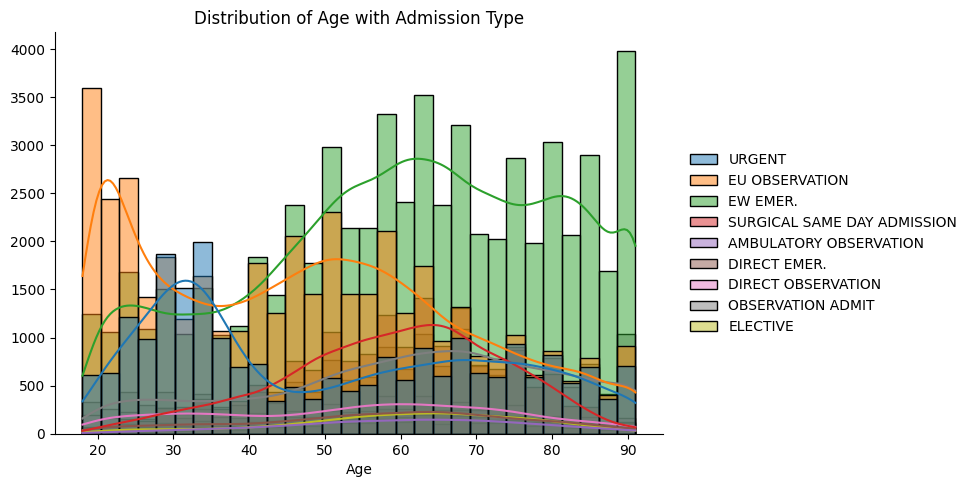

In [23]:
sns.displot(data = note2_df, x = "anchor_age", bins = 30 , hue = 'admission_type',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Admission Type")
plt.xticks(rotation=0)

plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [24]:
d = {}

for i in note2_df["admission_type"].unique():
    a = mean_calc("admission_type", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'URGENT': 46.0,
 'EU OBSERVATION': 47.0,
 'DIRECT OBSERVATION': 56.0,
 'DIRECT EMER.': 59.0,
 'SURGICAL SAME DAY ADMISSION': 60.0,
 'AMBULATORY OBSERVATION': 61.0,
 'EW EMER.': 62.0,
 'ELECTIVE': 62.0,
 'OBSERVATION ADMIT': 63.0}

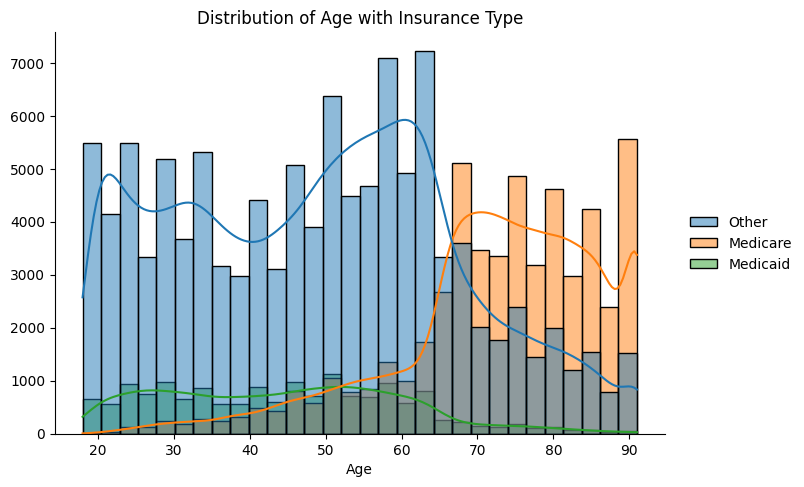

In [25]:
sns.displot(data = note2_df, x = "anchor_age", bins = 30 , hue = 'insurance',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Insurance Type")
plt.xticks(rotation=0)

plt.savefig(POST_PROCESS_PATH + f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [26]:
d = {}
for i in note2_df["insurance"].unique():
    a = mean_calc("insurance", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'Medicaid': 44.0, 'Other': 50.0, 'Medicare': 74.0}